In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [20]:
def image() :
    img = cv2.imread('../pine.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    return img

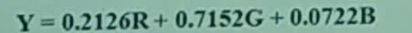

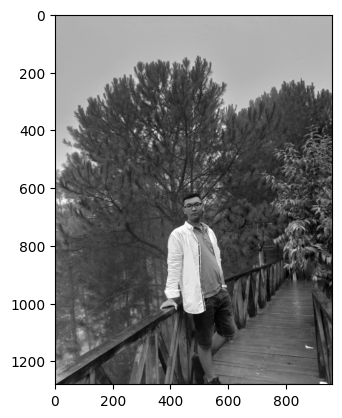

In [21]:
image = image()
R = image[:, :, 2]
G = image[:, :, 1]
B = image[:, :, 0]

grayscale_image = 0.2126 * R + 0.7152 * G + 0.0722 * B

grayscale_image = np.clip(grayscale_image, 0, 255).astype(np.uint8)

plt.imshow(grayscale_image, cmap='gray')


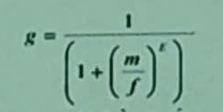

C:\Users\thong\AppData\Local\Temp\ipykernel_4916\965773547.py:9: RuntimeWarning: divide by zero encountered in divide
  transformed_image = 1 / (1 + np.power(m / image, r))


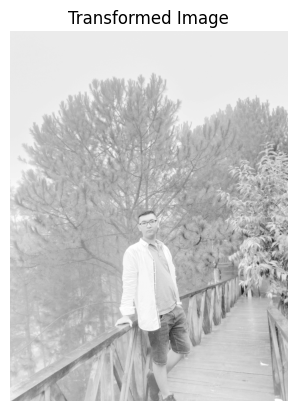

True

In [33]:
import cv2
import numpy as np

def apply_formula(image, m, r):
    # Chuyển đổi ảnh sang float32 để tránh hiện tượng tràn số khi tính toán
    image = image.astype(np.float32)
    
    # Biến đổi từng pixel theo công thức đã cho
    transformed_image = 1 / (1 + np.power(m / image, r))
    
    # Chuẩn hóa lại giá trị ảnh từ 0-255
    transformed_image = np.clip(transformed_image * 255, 0, 255).astype(np.uint8)
    
    return transformed_image

# Đọc ảnh từ file
image_path = '../pine.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Tham số m và r
m = 128  # Ví dụ giá trị m là 128
r = 0.5    # Ví dụ giá trị r là 2

# Áp dụng hàm biến đổi
transformed_image = apply_formula(image, m, r)

# Hiển thị ảnh kết quả
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')
plt.show()

# Lưu ảnh kết quả
cv2.imwrite('transformed_image.png', transformed_image)


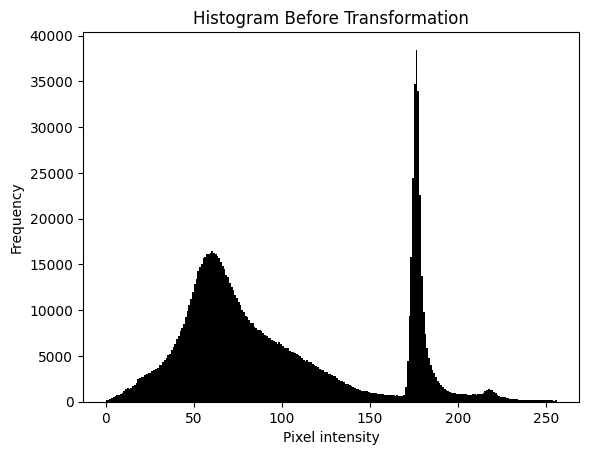

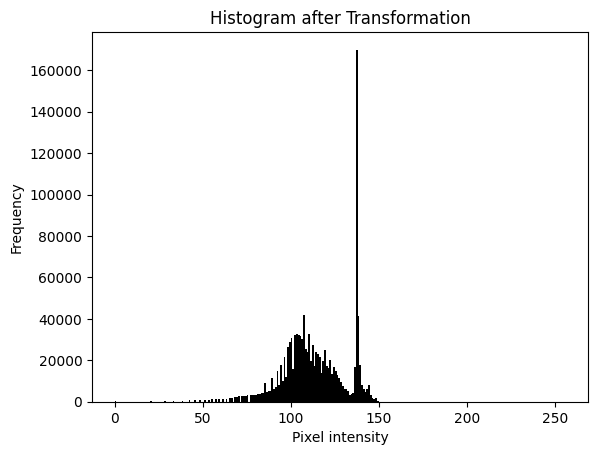

In [35]:
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
    plt.title(title)
    plt.xlabel('Pixel intensity')
    plt.ylabel('Frequency')
    plt.show()
    
    
plot_histogram(image, "Histogram Before Transformation")
plot_histogram(transformed_image, "Histogram after Transformation")


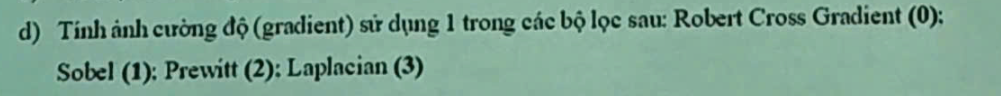

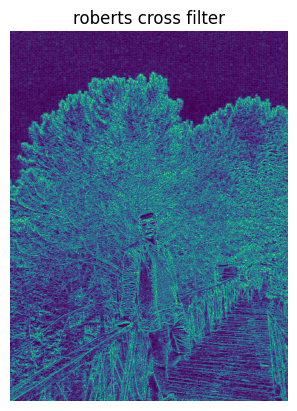

In [41]:
import cv2
import numpy as np

def roberts_cross(image):
    kernel_x = np.array([[1, 0], [0, -1]], dtype=int)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=int)
    
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)
    
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_magnitude = np.clip(gradient_magnitude, 0, 255).astype(np.uint8)
    
    return gradient_magnitude

# Đọc ảnh
image = cv2.imread('../pine.jpg', cv2.IMREAD_GRAYSCALE)
roberts_image = roberts_cross(image)

plt.imshow(roberts_image)
plt.title('roberts cross filter')
plt.axis('off')
plt.show()


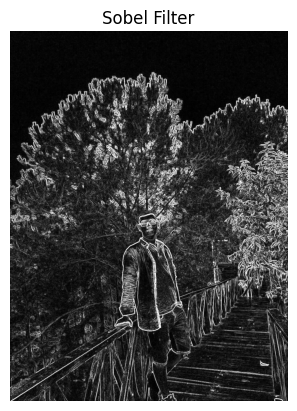

In [37]:
def sobel(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_magnitude = np.clip(gradient_magnitude, 0, 255).astype(np.uint8)
    
    return gradient_magnitude

sobel_image = sobel(image)

plt.imshow(sobel_image, cmap='gray')
plt.title('Sobel Filter')
plt.axis('off')
plt.show()


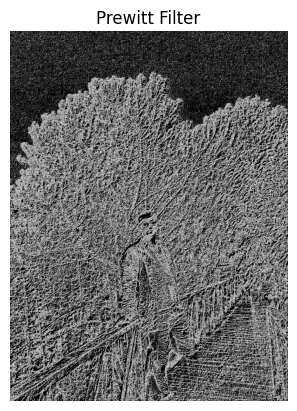

In [42]:
def prewitt(image):
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
    
    grad_x = cv2.filter2D(image, -1, kernel_x)
    grad_y = cv2.filter2D(image, -1, kernel_y)
    
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_magnitude = np.clip(gradient_magnitude, 0, 255).astype(np.uint8)
    
    return gradient_magnitude

prewitt_image = prewitt(image)

plt.imshow(prewitt_image, cmap='gray')
plt.title('Prewitt Filter')
plt.axis('off')
plt.show()


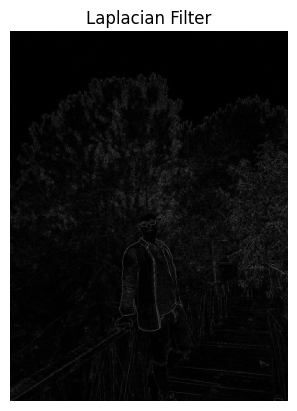

In [43]:
def laplacian(image):
    laplacian_image = cv2.Laplacian(image, cv2.CV_64F)
    laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)
    
    return laplacian_image

laplacian_image = laplacian(image)

plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')
plt.show()


Giải thích chi tiết:
- Robert Cross Gradient: Bộ lọc đơn giản nhất, phát hiện các cạnh chủ yếu theo hướng chéo, thích hợp cho các tác vụ phát hiện cạnh cơ bản.
- Sobel: Là cải tiến của Prewitt, sử dụng mặt nạ lớn hơn và tính gradient mạnh hơn. Phổ biến trong xử lý ảnh vì tính hiệu quả cao khi làm việc với ảnh có nhiễu.
- Prewitt: Đơn giản và ít nhạy với nhiễu, nhưng vẫn đủ mạnh để phát hiện cạnh theo các hướng ngang và dọc.
- Laplacian: Tính gradient tổng quát nhất, áp dụng đồng thời cả hai trục x và y. Tuy nhiên, nó rất nhạy với nhiễu và thường cần thêm bước làm mịn trước khi sử dụng.


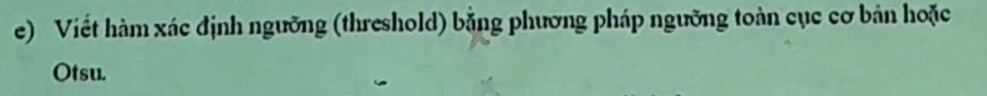

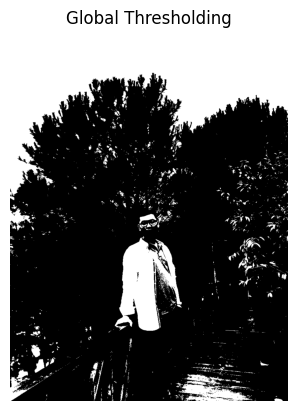

In [45]:
import cv2

def global_threshold(image, threshold_value=127):
    # Áp dụng ngưỡng toàn cục
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresholded_image

# Đọc ảnh xám
image = cv2.imread('../pine.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng ngưỡng toàn cục
threshold_value = 127  # Bạn có thể điều chỉnh giá trị này
binary_image = global_threshold(image, threshold_value)

# Hiển thị ảnh
plt.imshow(binary_image, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()


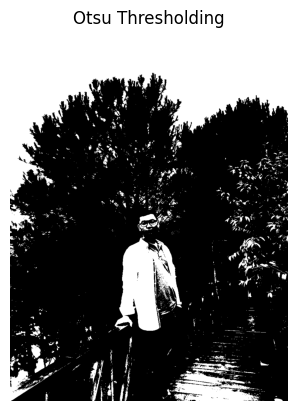

In [47]:
def otsu_threshold(image):
    # Áp dụng ngưỡng Otsu
    _, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_image

# Áp dụng phương pháp Otsu
otsu_image = otsu_threshold(image)

# Hiển thị ảnh
plt.imshow(otsu_image, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')
plt.show()


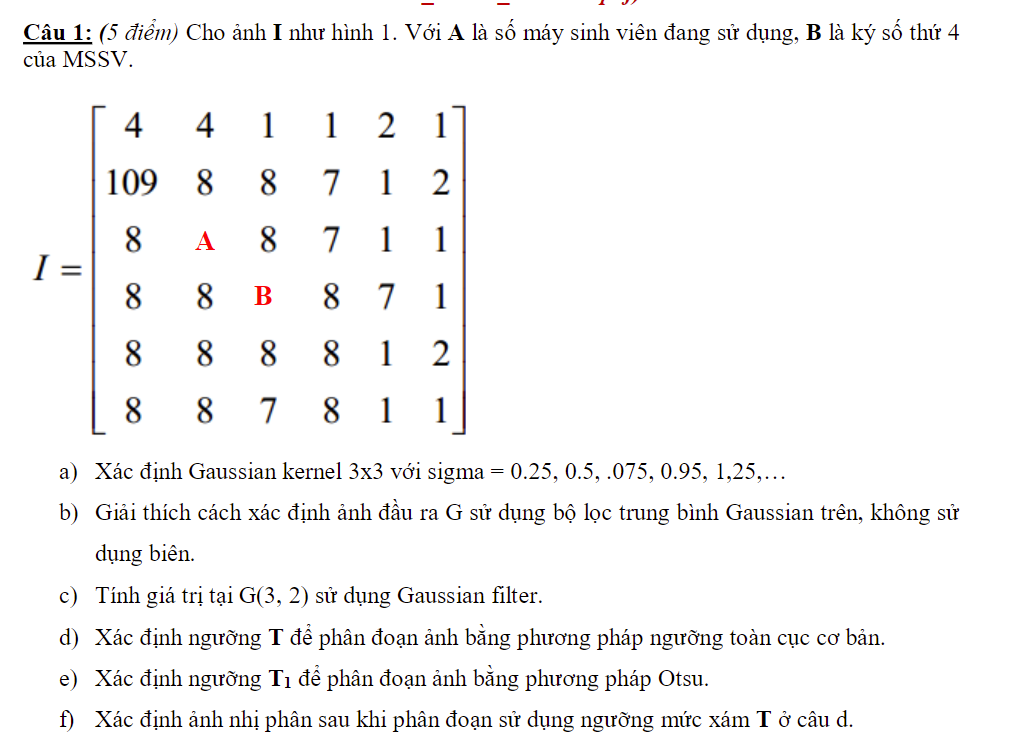

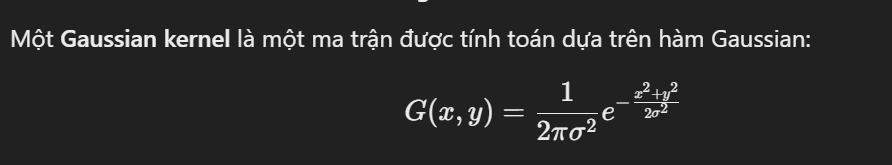

In [58]:
import cv2
import numpy as np

def gaussian_kernel(size, sigma):
    kernel = cv2.getGaussianKernel(size, sigma)
    gaussian = np.outer(kernel, kernel)
    return gaussian

sigmas = [0.25, 0.5, 0.75, 0.95, 0.125]
for i in sigmas:
    print(f"gaussian với kernel 3x3 voi sigma {i} \n" ,gaussian_kernel(3, i), end="\n\n") 

gaussian với kernel 3x3 voi sigma 0.25 
 [[1.12384321e-07 3.35012940e-04 1.12384321e-07]
 [3.35012940e-04 9.98659499e-01 3.35012940e-04]
 [1.12384321e-07 3.35012940e-04 1.12384321e-07]]

gaussian với kernel 3x3 voi sigma 0.5 
 [[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]

gaussian với kernel 3x3 voi sigma 0.75 
 [[0.05089992 0.12381027 0.05089992]
 [0.12381027 0.30115924 0.12381027]
 [0.05089992 0.12381027 0.05089992]]

gaussian với kernel 3x3 voi sigma 0.95 
 [[0.07148314 0.12439703 0.07148314]
 [0.12439703 0.2164793  0.12439703]
 [0.07148314 0.12439703 0.07148314]]

gaussian với kernel 3x3 voi sigma 0.125 
 [[1.60381089e-28 1.26641655e-14 1.60381089e-28]
 [1.26641655e-14 1.00000000e+00 1.26641655e-14]
 [1.60381089e-28 1.26641655e-14 1.60381089e-28]]



b) Giải thích cách xác định ảnh đầu ra G sử dụng bộ lọc trung bình Gaussian, không sử dụng biên
Để tính ảnh đầu ra 
𝐺
G bằng bộ lọc Gaussian, chúng ta áp dụng bộ lọc Gaussian kernel lên ảnh 
𝐼
I. Bộ lọc sẽ được trượt qua từng pixel trong ảnh, và với mỗi vị trí, giá trị pixel mới là tổng các tích của giá trị pixel và kernel tương ứng trong vùng lân cận. Trong trường hợp không sử dụng biên, các pixel ở viền của ảnh sẽ không được xử lý hoặc sẽ có giá trị khác (thường là 0 hoặc giá trị mặc định).

Đối với bộ lọc Gaussian, bạn thường không sử dụng biên để đảm bảo ảnh không bị biến dạng bởi các phần tử bên ngoài.

In [61]:
def apply_gaussian(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Đọc ma trận ảnh I
I = np.array([[4, 4, 4, 1, 1, 2, 1],
              [109, 8, 8, 8, 7, 1, 2],
              [8, 8, 99, 8, 7, 1, 1],
              [8, 8, 8, 9, 7, 1, 1],
              [8, 8, 8, 7, 7, 1, 1]])

# Áp dụng Gaussian filter
# Áp dụng bộ lọc Gaussian mà không sử dụng biên
sigma = 0.95  # Chọn một giá trị sigma
gaussian_kernel = cv2.getGaussianKernel(3, sigma)
gaussian_kernel_2d = gaussian_kernel * gaussian_kernel.T

# Chuyển đổi ma trận I sang kiểu np.float32
I_float32 = I.astype(np.float32)

# Áp dụng bộ lọc Gaussian
G = cv2.filter2D(I_float32, -1, gaussian_kernel_2d)
print("Ảnh sau khi áp dụng bộ lọc Gaussian:\n", G)


Ảnh sau khi áp dụng bộ lọc Gaussian:
 [[31.267107  20.5785     5.7657156  4.973311   3.6179254  2.2172432
   1.4975882]
 [28.794956  25.999615  18.036226  12.651993   4.487902   2.4240751
   1.3594456]
 [20.5641    26.539927  27.7711    19.177162   5.7346663  2.675663
   1.124397 ]
 [ 8.        14.504967  19.373043  14.329685   5.716097   2.6041799
   1.       ]
 [ 8.         8.         8.018569   7.7649508  5.681752   2.6041799
   1.       ]]


In [63]:
# Tính giá trị G(3, 2)
G_3_2 = G[2, 1]  # Indexing theo Python (bắt đầu từ 0)
print(f"Giá trị tại G(3,2): {G_3_2}")

Giá trị tại G(3,2): 26.539926528930664


In [69]:
def global_threshold(image, T=127):
    _, thresholded_image = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
    return thresholded_image

# Áp dụng ngưỡng toàn cục
binary_image = global_threshold(image)
binary_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [70]:
def otsu_threshold(image):
    _, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return otsu_image

# Áp dụng phương pháp Otsu
otsu_image = otsu_threshold(image)
otsu_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [71]:
# binary_image_after_T = global_threshold(image, binary_image)
# binary_image_after_T

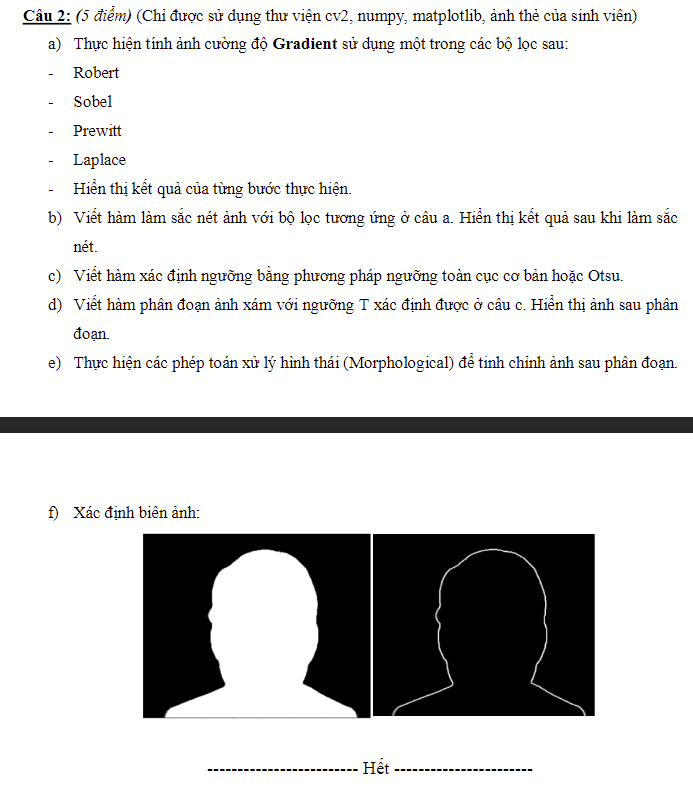

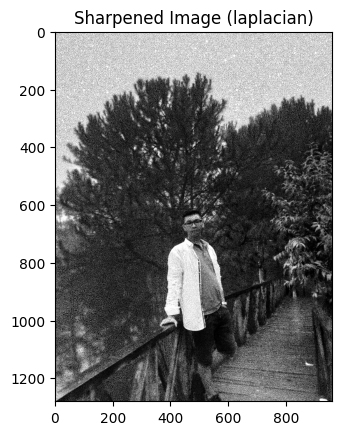

In [77]:
def sharpen_image(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = laplacian.astype(image.dtype)  # Ensure same type
    sharpened_image = cv2.addWeighted(image, 1.5, laplacian, -0.5, 0)
    return np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Làm sắc nét ảnh
sharpened_image = sharpen_image(image)

# Hiển thị ảnh
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (laplacian)')
plt.show()


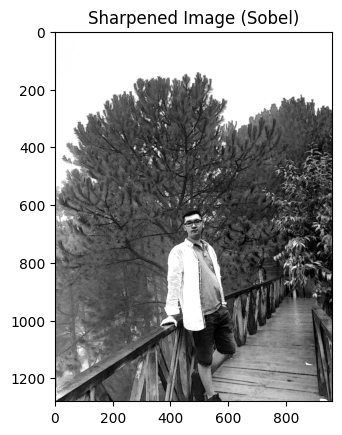

In [74]:
def sharpen_image_sobel(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel = sobel.astype(image.dtype)  # Ensure same type
    sharpened_image = cv2.addWeighted(image, 1.5, sobel, -0.5, 0)
    return np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Làm sắc nét với Sobel
sharpened_image_sobel = sharpen_image_sobel(image)

# Hiển thị ảnh Sobel
plt.imshow(sharpened_image_sobel, cmap='gray')
plt.title('Sharpened Image (Sobel)')
plt.show()


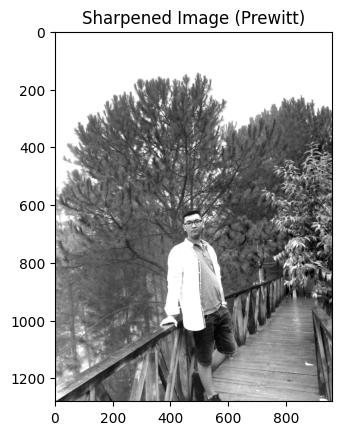

In [75]:
def sharpen_image_prewitt(image):
    prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
    prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
    grad_x = cv2.filter2D(image, -1, prewitt_x)
    grad_y = cv2.filter2D(image, -1, prewitt_y)
    prewitt = np.sqrt(grad_x**2 + grad_y**2)
    prewitt = prewitt.astype(image.dtype)  # Ensure same type
    sharpened_image = cv2.addWeighted(image, 1.5, prewitt, -0.5, 0)
    return np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Làm sắc nét với Prewitt
sharpened_image_prewitt = sharpen_image_prewitt(image)

# Hiển thị ảnh Prewitt
plt.imshow(sharpened_image_prewitt, cmap='gray')
plt.title('Sharpened Image (Prewitt)')
plt.show()


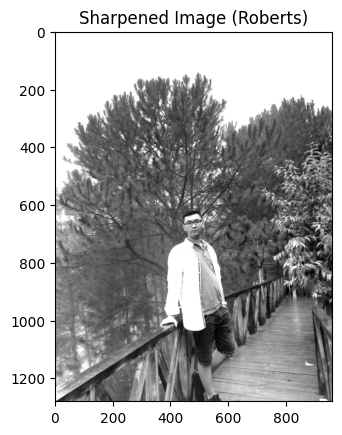

In [76]:
def sharpen_image_roberts(image):
    roberts_x = np.array([[1, 0], [0, -1]], dtype=int)
    roberts_y = np.array([[0, 1], [-1, 0]], dtype=int)
    grad_x = cv2.filter2D(image, -1, roberts_x)
    grad_y = cv2.filter2D(image, -1, roberts_y)
    roberts = np.sqrt(grad_x**2 + grad_y**2)
    roberts = roberts.astype(image.dtype)  # Ensure same type
    sharpened_image = cv2.addWeighted(image, 1.5, roberts, -0.5, 0)
    return np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Làm sắc nét với Roberts
sharpened_image_roberts = sharpen_image_roberts(image)

# Hiển thị ảnh Roberts
plt.imshow(sharpened_image_roberts, cmap='gray')
plt.title('Sharpened Image (Roberts)')
plt.show()


TypeError: Image data of dtype object cannot be converted to float

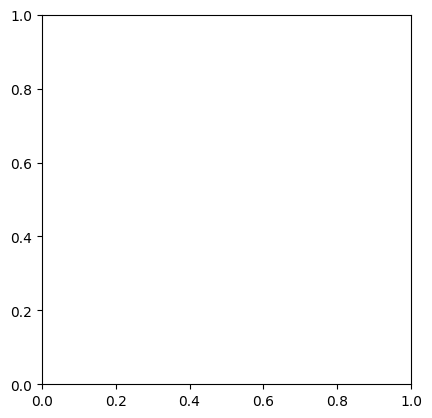

In [80]:
import cv2
import matplotlib.pyplot as plt

def global_threshold(image, T=127):
    # Áp dụng ngưỡng toàn cục
    _, thresholded_image = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
    return thresholded_image

# Đọc ảnh
image = cv2.imread('path_to_image_file', cv2.IMREAD_GRAYSCALE)

# Áp dụng ngưỡng toàn cục
T = 127  # Bạn có thể thay đổi giá trị T
binary_image_global = global_threshold(image, T)

# Hiển thị ảnh
plt.imshow(binary_image_global, cmap='gray')
plt.title('Global Thresholding')
plt.show()


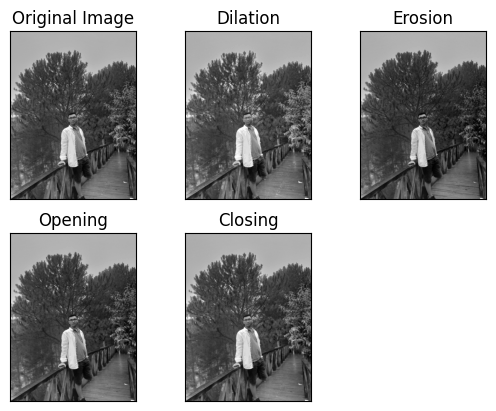

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hàm thực hiện các phép toán xử lý hình thái
def morphological_operations(image):
    kernel = np.ones((3, 3), np.uint8)  # Kernel kích thước 3x3
    
    # Thực hiện phép giãn nở
    dilation = cv2.dilate(image, kernel, iterations=1)
    
    # Thực hiện phép co rút
    erosion = cv2.erode(image, kernel, iterations=1)
    
    # Thực hiện phép mở (co rút rồi giãn nở)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # Thực hiện phép đóng (giãn nở rồi co rút)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    
    return dilation, erosion, opening, closing

# Đọc ảnh nhị phân đã phân đoạn
binary_image = cv2.imread('../pine.jpg', cv2.IMREAD_GRAYSCALE)

# Thực hiện các phép toán xử lý hình thái
dilation, erosion, opening, closing = morphological_operations(binary_image)

# Hiển thị kết quả
titles = ['Original Image', 'Dilation', 'Erosion', 'Opening', 'Closing']
images = [binary_image, dilation, erosion, opening, closing]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
